### CA 1
Submitted by : Pang Daowei

### Kaggle King Country House Prices

This challenge explores the King County Housing Dataset through several different models. 

The notebook includes a thorough EDA and cleaning section, study of different models using different categorical methods with extensive parameter tuning, an exploration of different feature selection methods, an evaluation of the final model, and visualizations.

#### This Notebook will do the following:

#### Data Handling:
* data importing
* data exploratory
* data preparation & transformation

#### Data Analysis:
* train/test model, predict model
* supervised machine learning techniques:
    * linear regression model
    * ridge regression model
    * lasso regression model
    * decision tree regression
    * random forest regression
    * gradient boost regression
* include hyperparameters tuning using GridSearchCV
* features importance

In [1]:
# shift-tab to show docstring: highlight and shift-tab: format
#?zip()
#%lsmagic
# Suppress Future Warnings
import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

### Data Importing

In [2]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib
import seaborn
import platform

message="        Versions        "
print("*"*len(message))
print(message)
print("*"*len(message))
print("Scikit-learn version={}".format(sklearn.__version__))
print("Numpy version={}".format(np.__version__))
print("Pandas version={}".format(pd.__version__))
print("Matplotlib version={}".format(matplotlib.__version__))
print("Seaborn version={}".format(seaborn.__version__))
print("Python version={}".format(platform.python_version()))

************************
        Versions        
************************
Scikit-learn version=0.22.1
Numpy version=1.18.1
Pandas version=1.0.1
Matplotlib version=3.1.3
Seaborn version=0.10.0
Python version=3.7.6


In [3]:
from sklearn import datasets 
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data = pd.read_csv("kc_house_data.csv")
data.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


### Exploratory Data Analysis

The dataset includes homes sold between May 2014 and May 2015.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
# id :a notation for a house
# date: Date house was sold
# price: Price is prediction target
# bedrooms: Number of Bedrooms/House
# bathrooms: Number of bathrooms/bedrooms
# sqft_living: square footage of the home
# sqft_lot: square footage of the lot
# floors :Total floors (levels) in house
# waterfront :House which has a view to a waterfront
# view: Has been viewed
# condition :How good the condition is Overall
# grade: overall grade given to the housing unit, based on King County grading system
# sqft_above :square footage of house apart from basement
# sqft_basement: square footage of the basement
# yr_built :Built Year
# yr_renovated :Year when house was renovated
# zipcode:zip code
# lat: Latitude coordinate
# long: Longitude coordinate
# sqft_living15 :Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area
# sqft_lot15 :lotSize area in 2015(implies-- some renovations)

In [7]:
# List out all variables with nulls/missing values
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

By observing the data, price is dependent on various features. <br>
Of all the records, there are no missing values.

In [8]:
# remove id
# id has no meaning
data1 = data.drop(['id'], axis=1)
data1.head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [9]:
# convert datetime string to real datetime
data1.date = pd.to_datetime(data1.date)
data1.head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [10]:
data1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141767,367127.196483,75000.0000,321950.000,450000.0000,645000.000,7.700000e+06
bedrooms,21613.0,3.370842,0.930062,0.0000,3.000,3.0000,4.000,3.300000e+01
bathrooms,21613.0,2.114757,0.770163,0.0000,1.750,2.2500,2.500,8.000000e+00
sqft_living,21613.0,2079.899736,918.440897,290.0000,1427.000,1910.0000,2550.000,1.354000e+04
sqft_lot,21613.0,15106.967566,41420.511515,520.0000,5040.000,7618.0000,10688.000,1.651359e+06
floors,21613.0,1.494309,0.539989,1.0000,1.000,1.5000,2.000,3.500000e+00
waterfront,21613.0,0.007542,0.086517,0.0000,0.000,0.0000,0.000,1.000000e+00
view,21613.0,0.234303,0.766318,0.0000,0.000,0.0000,0.000,4.000000e+00
condition,21613.0,3.409430,0.650743,1.0000,3.000,3.0000,4.000,5.000000e+00
grade,21613.0,7.656873,1.175459,1.0000,7.000,7.0000,8.000,1.300000e+01


#### look at the label, price, first to have an understanding

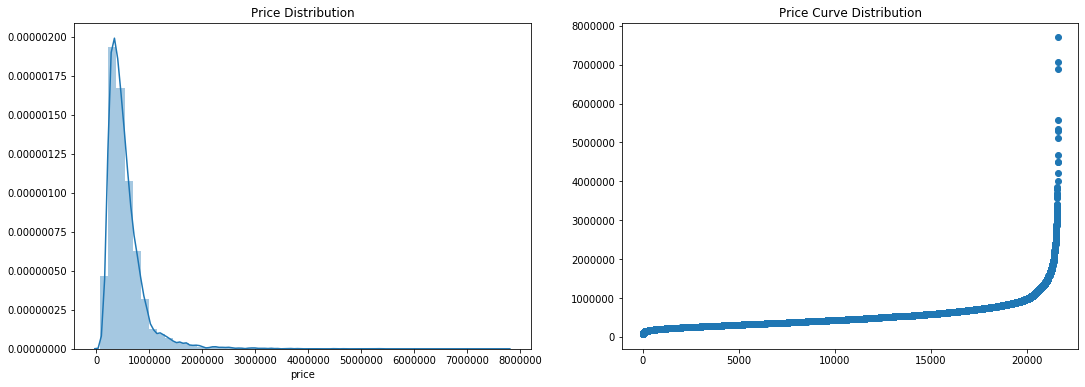

In [11]:
# look at price distribution
plt.figure(figsize=(18,6))

plt.subplot(121)
plt.title("Price Distribution")
sns.distplot(data1["price"])

plt.subplot(122)
plt.scatter(range(data1.shape[0]),np.sort(data1["price"].values))
plt.title("Price Curve Distribution")

plt.show()

Plots show positive skewness <br>
This means most of the population here can only afford housing < 1 million <br>
Price column has to be standardized

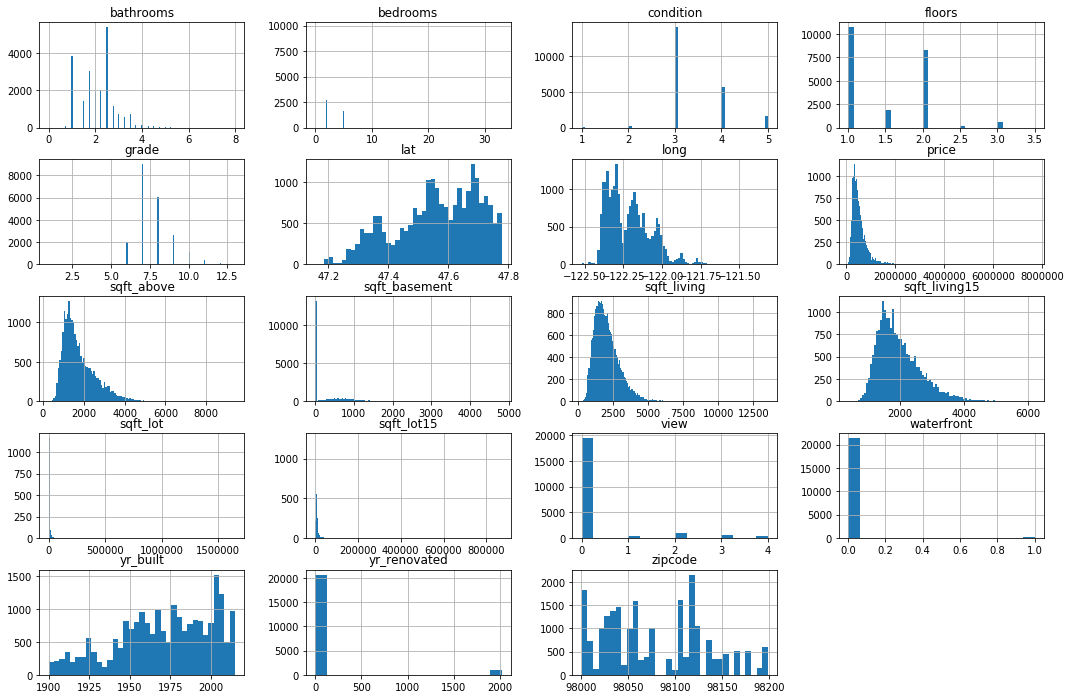

In [12]:
data1.hist(figsize=(18,12), bins='auto');

### Data Preparation

#### it seems like something not right with the bedrooms

there is a distinctive anamoly, stating >30 bedrooms

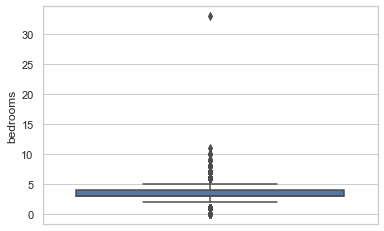

In [13]:
%matplotlib inline

import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(y=data1["bedrooms"])

In [14]:
# find the data point with too high no. of bedrooms
data1.loc[data1["bedrooms"]>30]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [15]:
# change the data point bedrooms figure to a mean number
bedroom_mean = round(data1.bedrooms.mean(),0)
data1.loc[data1.bedrooms==33.0, "bedrooms"] = bedroom_mean

# check the new value of bedrooms
data1.iloc[15870]['bedrooms']

3.0

#### something also doesnt seem right with sqft_lot and sqft_lot15
#### same with sqft_basement

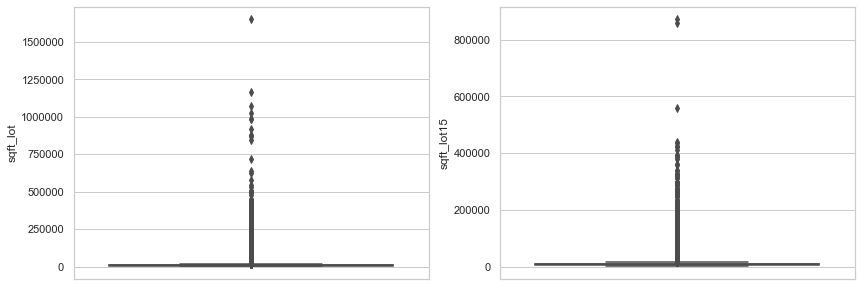

In [16]:
plt.figure(figsize=(14,5))
plt.subplot(121)
ax1 = sns.boxplot(y=data1["sqft_lot"])
plt.subplot(122)
ax2 = sns.boxplot(y=data1["sqft_lot15"])

In [17]:
data1.sort_values('sqft_lot15', ascending=False).head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9714,2015-01-07,937500.0,4.0,4.00,5545,871200,2.0,0,0,3,11,3605,1940,2003,0,98014,47.6760,-121.882,3420,871200
20452,2015-04-15,1600000.0,4.0,5.50,6530,871200,2.0,0,2,3,11,6530,0,2008,0,98014,47.6640,-121.878,1280,858132
13464,2014-11-07,790000.0,3.0,2.50,2640,432036,1.5,0,3,3,10,2640,0,1996,0,98022,47.1795,-122.036,1500,560617
8664,2014-10-19,549950.0,3.0,1.75,2930,266587,2.0,0,0,3,8,2440,490,1995,0,98014,47.6991,-121.947,2700,438213
3801,2014-08-26,637000.0,4.0,3.50,3080,118918,2.0,0,0,3,9,3080,0,2008,0,98019,47.7721,-121.924,1830,434728


In [18]:
data1.sort_values('sqft_lot', ascending=False).head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1719,2015-03-27,700000.0,4.0,1.00,1300,1651359,1.0,0,3,4,6,1300,0,1920,0,98022,47.2313,-122.023,2560,425581
17319,2015-05-04,190000.0,2.0,1.00,710,1164794,1.0,0,0,2,5,710,0,1915,0,98014,47.6888,-121.909,1680,16730
7647,2014-05-21,542500.0,5.0,3.25,3010,1074218,1.5,0,0,5,8,2010,1000,1931,0,98027,47.4564,-122.004,2450,68825
7769,2015-01-19,855000.0,4.0,3.50,4030,1024068,2.0,0,0,3,10,4030,0,2006,0,98045,47.4619,-121.744,1830,11700
3949,2014-09-05,998000.0,4.0,3.25,3770,982998,2.0,0,0,3,10,3770,0,1992,0,98058,47.4140,-122.087,2290,37141


To perform normalization on these features later

#### date, yr_built, yr_renovated 

In [19]:
data1.yr_renovated.unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944], dtype=int64)

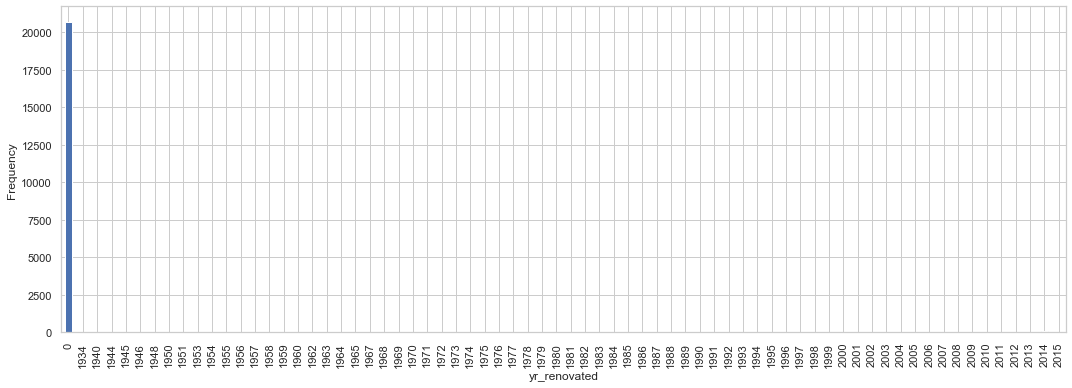

In [20]:
df = data1.groupby('yr_renovated').size()
plt.figure(figsize=(18,6))
df.plot(kind='bar');
plt.ylabel('Frequency');

convert variable into whether the house has been renovated, instead of the year

In [21]:
data1.loc[data1.yr_renovated==0, "renovated"] = 0
data1.loc[data1.yr_renovated>0, "renovated"] = 1

In [22]:
# drop the yr_renovated
data1 = data1.drop('yr_renovated', axis=1)

In [23]:
data1['date_yr'] = data1.date.transform(lambda x: x.year)

In [24]:
data1['age'] = data1.date_yr - data1.yr_built

In [25]:
data1 = data1.drop(['date', 'yr_built', 'date_yr'], axis=1)

In [26]:
data1

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,age
0,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,0.0,59
1,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,1.0,63
2,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,98028,47.7379,-122.233,2720,8062,0.0,82
3,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,0.0,49
4,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,0.0,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3.0,2.50,1530,1131,3.0,0,0,3,8,1530,0,98103,47.6993,-122.346,1530,1509,0.0,5
21609,400000.0,4.0,2.50,2310,5813,2.0,0,0,3,8,2310,0,98146,47.5107,-122.362,1830,7200,0.0,1
21610,402101.0,2.0,0.75,1020,1350,2.0,0,0,3,7,1020,0,98144,47.5944,-122.299,1020,2007,0.0,5
21611,400000.0,3.0,2.50,1600,2388,2.0,0,0,3,8,1600,0,98027,47.5345,-122.069,1410,1287,0.0,11


#### Map Visualization

In [27]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [28]:
import folium
from folium.plugins import HeatMap

In [29]:
lat_mean = data1.lat.mean()
lon_mean = data1.long.mean()
basemap = folium.Map(location=[lat_mean, lon_mean], zoom_start=10)

coords = data1[['lat', 'long']].copy()
coords['count'] = 1
HeatMap(data = coords.groupby(['lat','long']).sum().reset_index().values.tolist(), 
        radius=8, max_zoom=13, name='Heat Map').add_to(basemap)
folium.LayerControl(collapsed=False).add_to(basemap)
basemap

I am not sure if the distance to city center (Seattle) would be a feature. <br>
The earlier intention is to find out if distance to city center is a feature, but given that:
1. there are too many city centers
2. focus of US social dynamics may be different - not concerned about distance to city center
3. difficulty to plot traffic distance from house to a centralized location

The social dynamics in US may be different from Singapore.

#### Data Normalization

Skewed data can mess up the power of the predictive model if not addressed correctly. <br>
There are 3 ways to change the skewed data, sqrt, log and box-cox. <br>
For simplicity sake, starting off with log.

In [30]:
from scipy.stats import skew, kurtosis

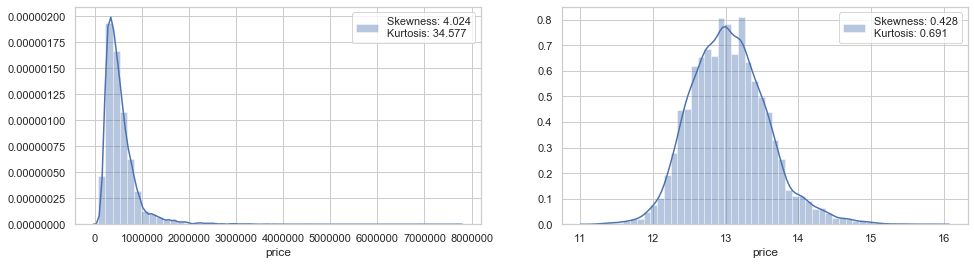

In [31]:
# using logarithmic to convert skewed data
price1 = data1.price
price2 = np.log(data1.price)

# need to plot graphs to see if there is double kinks
plt.figure(figsize=(16,4))
plt.subplot(121);
sns.distplot(price1);
plt.legend(['Skewness: {}\nKurtosis: {}'.format(round(skew(price1),3), round(kurtosis(price1),3))]);

plt.subplot(122);
sns.distplot(price2);
plt.legend(['Skewness: {}\nKurtosis: {}'.format(round(skew(price2),3), round(kurtosis(price2),3))]);

In [32]:
# conversion after confirmation
data1.price = np.log(data1.price)

#### now convert sqft type features

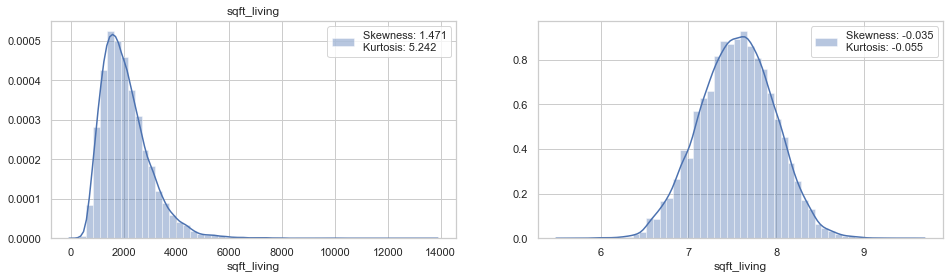

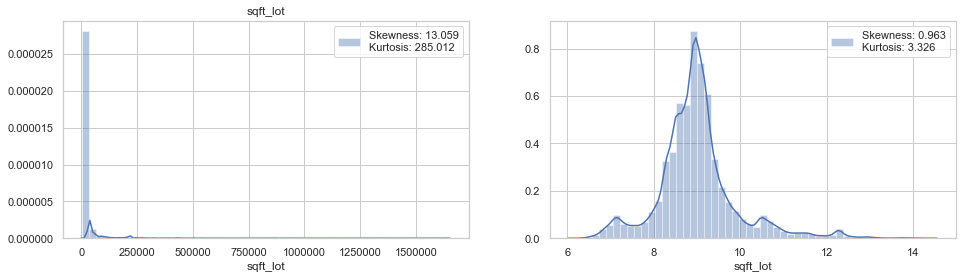

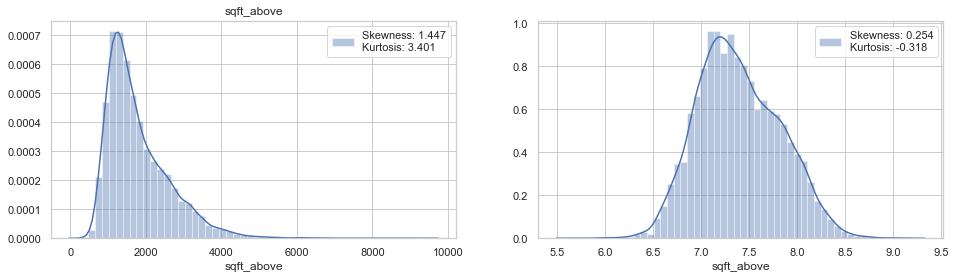

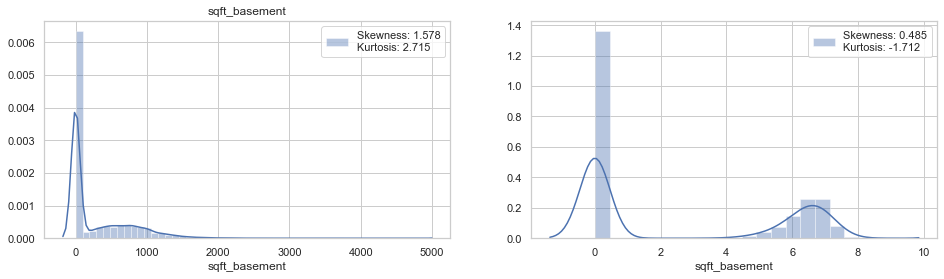

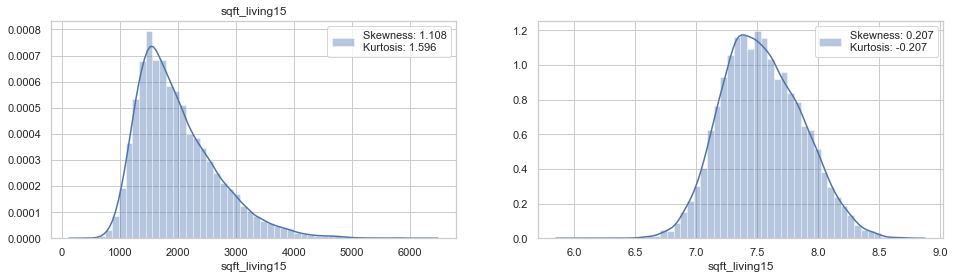

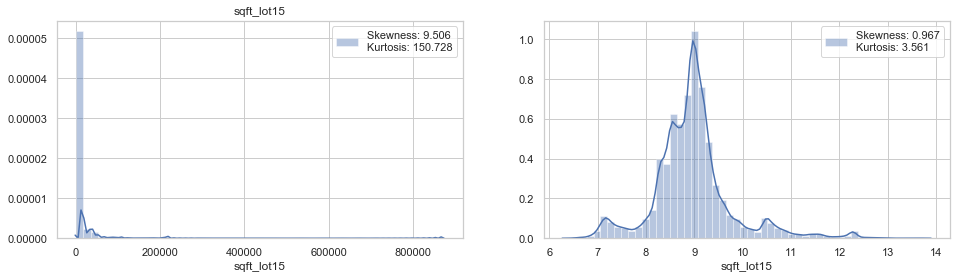

In [33]:
# using logarithmic to convert skewed sqft
# using np.log1p instead of np.log, np.log1p can work for x so small

filter_col = [col for col in data1 if col.startswith('sqft')]

for col in filter_col:
    var1 = data1[col]
    var2 = np.log1p(data1[col])

    # need to plot graphs to see if there is double kinks
    plt.figure(figsize=(16,4))
    plt.subplot(121);
    sns.distplot(var1);
    plt.title('{}'.format(col));
    plt.legend(['Skewness: {}\nKurtosis: {}'.format(round(skew(var1),3), round(kurtosis(var1),3))]);

    plt.subplot(122);
    sns.distplot(var2);
    plt.legend(['Skewness: {}\nKurtosis: {}'.format(round(skew(var2),3), round(kurtosis(var2),3))]);

It seems like sqft_basement has some issues, but continue with the logarthmic transformation

In [34]:
for col in filter_col:
    data1[col] = np.log1p(data1[col])

Relook at the histogram data

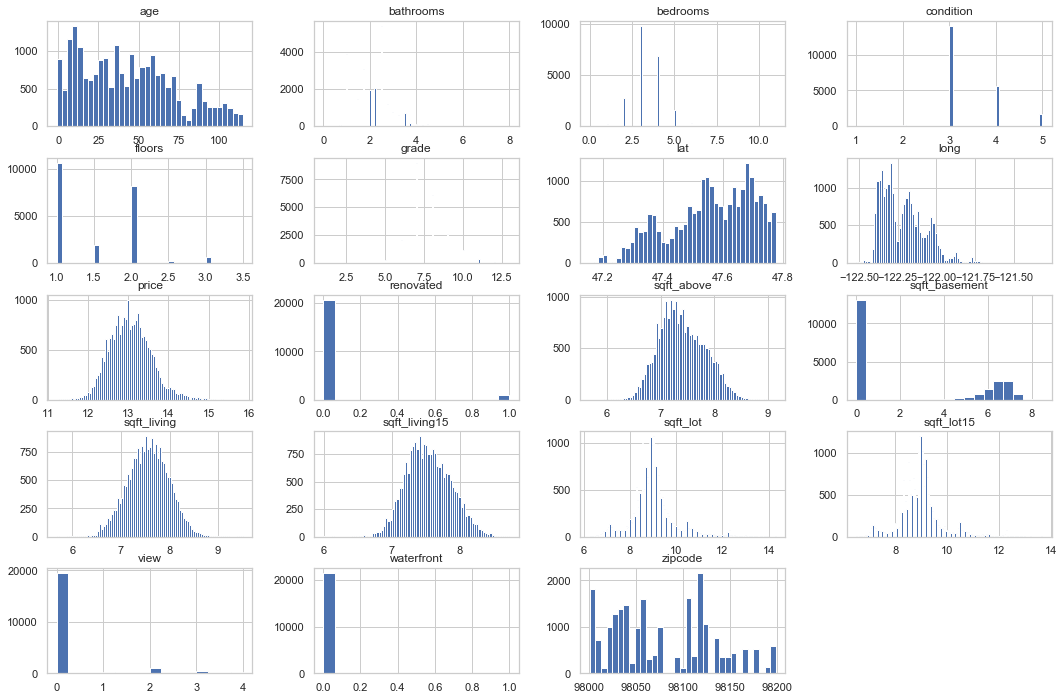

In [35]:
data1.hist(figsize=(18,12), bins='auto');

In [36]:
# Since all values are numeric, do a correction and sort to determine
# the most important features relative to Survived
corr = data1.corr()
corr1 = corr.copy()
corr1.sort_values(["price"], ascending = False, inplace = True)
print(corr1.price)

price            1.000000
grade            0.703634
sqft_living      0.674940
sqft_living15    0.607201
sqft_above       0.586322
bathrooms        0.550802
lat              0.449174
bedrooms         0.350990
view             0.346522
floors           0.310558
sqft_basement    0.236386
waterfront       0.174586
sqft_lot         0.137734
sqft_lot15       0.123001
renovated        0.114124
long             0.049942
condition        0.039558
zipcode         -0.038306
age             -0.080574
Name: price, dtype: float64


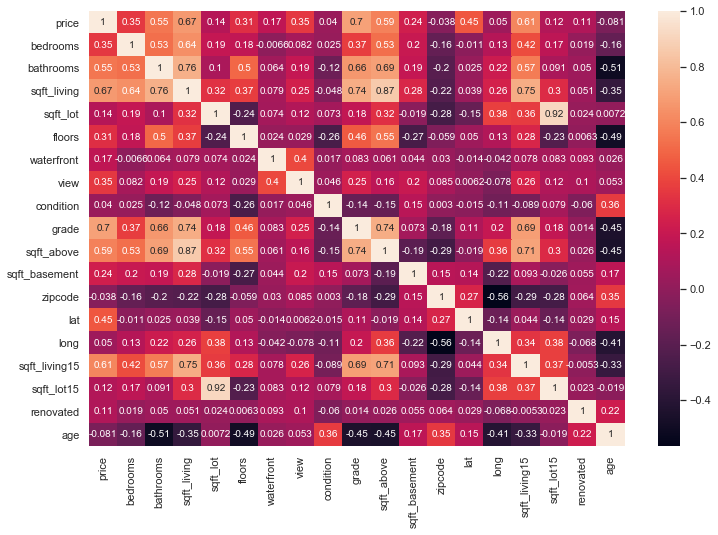

In [37]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, annot_kws={'fontsize':10})
plt.show()

In [38]:
data1.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'renovated', 'age'],
      dtype='object')

In [39]:
data2 = data1.drop(['lat','long'], axis=1)

Removed coordinates, unless it's important to know connection of distances to certain places

### 1a.Train Model w Linear Regression

Linear Regression is the most common basic modelling aspect.

#### Split Data into Train and Test Sets

In [125]:
# need to standardize since we have different scale for each feature
# standardscaler more appropriate for normal distributed data than minmaxscaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

y = data2["price"].values
X = data2.drop(["price"],axis=1).values
Xs = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.3, random_state=5)

#### Train Model with Algorithm: Linear Regression 

In [126]:
# Train Model with Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso, LassoCV

lin = LinearRegression(normalize=0)
lin.fit(X_train,y_train)
lin

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=0)

In [127]:
# training set accuracy score
lin.score(X_train, y_train)

0.6626905313093652

#### Score Model and Evaluate Model with:  Linear Regression

There are 3 main metrics for model evaluation in regression: <br>
1. R2 square - sum of prediction error squared / total sum of square 
2. MSE or RMSE - RMSE used more common, square rooted brings MSE back to the same level of prediction error
3. Mean Absolute Error

In [128]:
# r2 score aginst train set, test set
# rmse against test set 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

yhat_train = lin.predict(X_train)
yhat_test = lin.predict(X_test)
print("R2 Score for train={:.3f}".format(r2_score(y_train,yhat_train))) # R2 score, 1.0 is best
print("R2 Score for test={:.3f}".format(r2_score(y_test,yhat_test)))
print("RMSE for test: {:.3f}".format(np.sqrt(mean_squared_error(y_test, yhat_test))))

R2 Score for train=0.663
R2 Score for test=0.668
RMSE for test: 0.307


In [129]:
scores = cross_val_score(lin, X_test, y_test, cv=5)
print("Accuracy: {:.3f} (+/-{:.2f})".format(scores.mean(), scores.std()*2))

Accuracy: 0.665 (+/-0.04)


### 1b. Train with Ridge (L2 regularization)

In [130]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [131]:
ridge.score(X_train, y_train)

0.6626905312760962

In [132]:
yhat_train = ridge.predict(X_train)
yhat_test = ridge.predict(X_test)
print("R2 Score for train={:.3f}".format(r2_score(y_train,yhat_train))) 
print("R2 Score for test={:.3f}".format(r2_score(y_test,yhat_test)))
print("RMSE for test: {:.3f}".format(np.sqrt(mean_squared_error(y_test, yhat_test))))

R2 Score for train=0.663
R2 Score for test=0.668
RMSE for test: 0.307


In [133]:
scores = cross_val_score(ridge, X_test, y_test, cv=5)
print("Accuracy: {:.3f} (+/-{:.2f})".format(scores.mean(), scores.std()*2))

Accuracy: 0.665 (+/-0.04)


### 1c. Train with Lasso (L1 regularization)

In [134]:
# cannot use lasso, lassoCV will choose the right alphas
lasso = LassoCV()
lasso.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [135]:
lasso.score(X_train, y_train)

0.6626811461315125

In [136]:
yhat_train = lasso.predict(X_train)
yhat_test = lasso.predict(X_test)
print("R2 Score for train={:.3f}".format(r2_score(y_train,yhat_train))) 
print("R2 Score for test={:.3f}".format(r2_score(y_test,yhat_test)))
print("RMSE for test: {:.3f}".format(np.sqrt(mean_squared_error(y_test, yhat_test))))

R2 Score for train=0.663
R2 Score for test=0.668
RMSE for test: 0.307


In [137]:
scores = cross_val_score(lasso, X_test, y_test, cv=5)
print("Accuracy: {:.3f} (+/-{:.2f})".format(scores.mean(), scores.std()*2))

Accuracy: 0.665 (+/-0.04)


### 1d. GridSearchCV for Linear Regression

For Linear Regression, train score is 0.663, test score is 0.668.

In [138]:
from sklearn.model_selection import GridSearchCV

In [139]:
grid_params_lr = [{'fit_intercept' : [True,False],
                  'normalize' :[True,False],
                  'n_jobs' :[-1,1] }]
grid_search_lr = GridSearchCV(lin, grid_params_lr, n_jobs=-1, cv=3, verbose=1)
grid_result_lr = grid_search_lr.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.0s finished


In [140]:
grid_result_lr.best_params_

{'fit_intercept': True, 'n_jobs': -1, 'normalize': True}

In [141]:
yhat_train = grid_result_lr.predict(X_train)
yhat_test = grid_result_lr.predict(X_test)
print("R2 Score for train={:.3f}".format(r2_score(y_train,yhat_train))) 
print("R2 Score for test={:.3f}".format(r2_score(y_test,yhat_test)))
print("RMSE for test: {:.3f}".format(np.sqrt(mean_squared_error(y_test, yhat_test))))

R2 Score for train=0.663
R2 Score for test=0.668
RMSE for test: 0.307


This shows linear regression will not be a good fit. <br>
Logistic Regression is not a fit here since the response variable for Logistic Regression is more of a categorical type, e.g. >100000 or <100000

### 2a. Using DecisionTreeRegressor

In [142]:
from sklearn.tree import DecisionTreeRegressor

In [143]:
dtr = DecisionTreeRegressor(max_depth=4, min_samples_split=5, max_leaf_nodes=10)

In [144]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=10,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [145]:
yhat_train = dtr.predict(X_train)
yhat_test = dtr.predict(X_test)
print("R2 Score for train={:.3f}".format(r2_score(y_train,yhat_train))) 
print("R2 Score for test={:.3f}".format(r2_score(y_test,yhat_test)))
print("RMSE for test: {:.3f}".format(np.sqrt(mean_squared_error(y_test, yhat_test))))

R2 Score for train=0.571
R2 Score for test=0.568
RMSE for test: 0.351


In [146]:
scores = cross_val_score(dtr, X_test, y_test, cv=5)
print("Accuracy: {:.3f} (+/-{:.2f})".format(scores.mean(), scores.std()*2))

Accuracy: 0.544 (+/-0.05)


### 2b. Using DecisionTreeRegressor with GridSearchCV

In [147]:
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }

dtr = DecisionTreeRegressor()

grid_search_dtr = GridSearchCV(dtr, param_grid, cv=5)
grid_search_dtr.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 6, 8],
                         'max_leaf_nodes': [5, 20, 100],
                    

In [148]:
grid_search_dtr.best_params_

{'criterion': 'mse',
 'max_depth': 8,
 'max_leaf_nodes': 100,
 'min_samples_leaf': 20,
 'min_samples_split': 10}

In [149]:
yhat_train = grid_search_dtr.predict(X_train)
yhat_test = grid_search_dtr.predict(X_test)
print("R2 Score for train={:.3f}".format(r2_score(y_train,yhat_train))) 
print("R2 Score for test={:.3f}".format(r2_score(y_test,yhat_test)))
print("RMSE for test: {:.3f}".format(np.sqrt(mean_squared_error(y_test, yhat_test))))

R2 Score for train=0.717
R2 Score for test=0.685
RMSE for test: 0.300


In [150]:
scores = cross_val_score(grid_search_dtr, X_test, y_test, cv=5)
print("Accuracy: {:.3f} (+/-{:.2f})".format(scores.mean(), scores.std()*2))

Accuracy: 0.657 (+/-0.05)


When there are large number of features with less data-sets(with low noise), linear regressions may outperform Decision trees Regression.

### 3. Using RandomForestRegressor with GridSearchCV

Random Forests generally needs larger number of instances to work its randomization concept well and generalize to the novel data. <br>

When to use to decision tree:

When you want your model to be simple and explainable <br>
When you want non parametric model <br>
When you don't want to worry about feature selection or regularization or worry about multi-collinearity. <br>
You can overfit the tree and build a model if you are sure of validation or test data set is going to be subset of training data set or almost overlapping instead of unexpected. <br>

When to use random forest :

When you don't bother much about interpreting the model but want better accuracy. <br>
Random forest will reduce variance part of error rather than bias part, so on a given training data set decision tree may be more accurate than a random forest. But on an unexpected validation data set, Random forest always wins in terms of accuracy. <br>

In [151]:
from sklearn.ensemble import RandomForestRegressor

In [152]:
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [None],
    'max_features': [2, 3],
    'min_samples_leaf': [2, 3, 4],
    'min_samples_split': [3, 5, 7],
    'n_estimators': [200, 300, 350]
}

rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search_rf = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [153]:
grid_search_rf.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  3.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [154]:
grid_search_rf.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 350}

In [155]:
yhat_train = grid_search_rf.predict(X_train)
yhat_test = grid_search_rf.predict(X_test)
print("R2 Score for train={:.3f}".format(r2_score(y_train,yhat_train))) 
print("R2 Score for test={:.3f}".format(r2_score(y_test,yhat_test)))
print("RMSE for test: {:.3f}".format(np.sqrt(mean_squared_error(y_test, yhat_test))))

R2 Score for train=0.979
R2 Score for test=0.790
RMSE for test: 0.244


In [156]:
scores = cross_val_score(grid_search_rf, X_test, y_test, cv=5)
print("Accuracy: {:.3f} (+/-{:.2f})".format(scores.mean(), scores.std()*2))

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  1.2min finished


Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  1.2min finished


Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  1.2min finished


Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:   29.8s
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  1.2min finished


Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  1.2min finished


Accuracy: 0.753 (+/-0.03)


### Gradient Booster with GridSearchCV

Gradient-Boosted Trees generally perform better than a Random Forest, although there is a price for that: <br>
GBT have a few hyperparams to tune, while Random Forest is practically tuning-free.

In [170]:
from sklearn.ensemble import GradientBoostingRegressor

In [171]:
param_grid = {
    'learning_rate': [0.01, 0.03, 0.05],
    'subsample'    : [1.0, 0.5, 0.1],
    'n_estimators' : [1000, 2000, 3000],
    'max_depth'    : [4, 6, 8]
}

gb = GradientBoostingRegressor()

# Instantiate the grid search model
grid_search_gb = GridSearchCV(estimator = gb, param_grid = param_grid, cv = 2, n_jobs = -1)

In [172]:
grid_search_gb.fit(X_train, y_train)

GridSearchCV(cv=2, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...
                            

In [173]:
grid_search_gb.best_params_

{'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 3000, 'subsample': 0.5}

In [174]:
yhat_train = grid_search_gb.predict(X_train)
yhat_test = grid_search_gb.predict(X_test)
print("R2 Score for train={:.3f}".format(r2_score(y_train,yhat_train))) 
print("R2 Score for test={:.3f}".format(r2_score(y_test,yhat_test)))
print("RMSE for test: {:.3f}".format(np.sqrt(mean_squared_error(y_test, yhat_test))))

R2 Score for train=0.945
R2 Score for test=0.888
RMSE for test: 0.178


In [175]:
scores = cross_val_score(grid_search_gb, X_test, y_test, cv=5)
print("Accuracy: {:.3f} (+/-{:.2f})".format(scores.mean(), scores.std()*2))

Accuracy: 0.872 (+/-0.03)


seems like Gradient Boost Regressor is the best solution for now

### Features Importance

In [177]:
grid_search_gb_estimate = grid_search_gb.best_estimator_

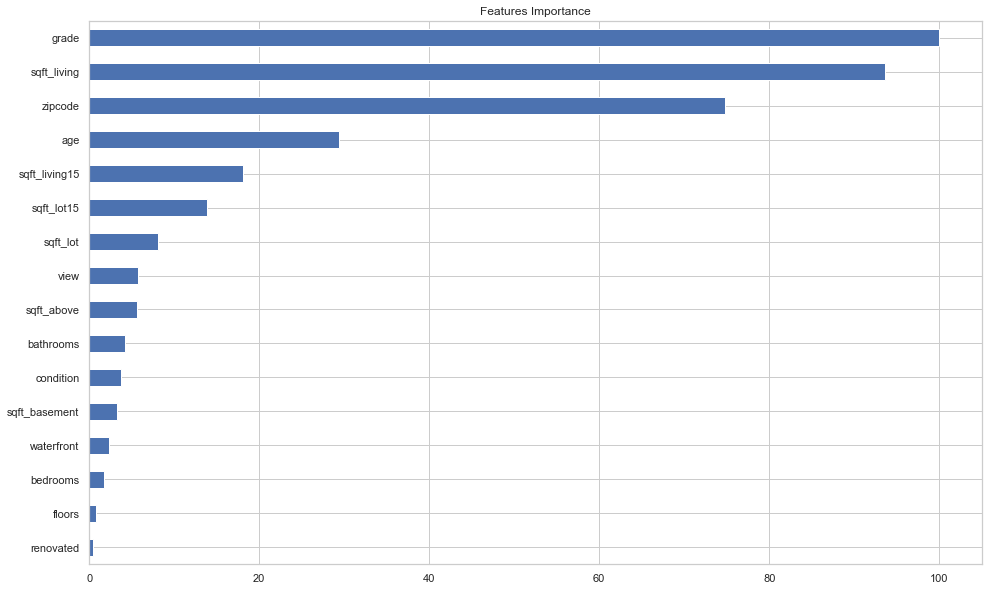

In [178]:
grid_search_gb_imp = grid_search_gb_estimate.feature_importances_
grid_search_gb_score = 100.0 * (grid_search_gb_imp/grid_search_gb_imp.max())

grid_search_gb_feature = pd.Series(grid_search_gb_score, index=data2.drop(["price"],axis=1).columns).sort_values(ascending=True)
grid_search_gb_feature.plot(kind='barh', figsize=(16,10), color='b', title='Features Importance')

Grade, sqft_living (square foot of living) and zipcode are the top 3 features in deciding price.

### Submitting to Kaggle

#### Score and Evaluate Stupid Baseline (predict the mean)

In [67]:
mean_price = data.price.mean()
print("mean price={}".format(mean_price))

mean price=540088.1417665294


In [68]:
ystupid = np.full(len(data),mean_price)
ystupid

array([540088.14176653, 540088.14176653, 540088.14176653, ...,
       540088.14176653, 540088.14176653, 540088.14176653])

In [69]:
y = data.price
print("R2 Score for stupid baseline is = {}".format(r2_score(y,ystupid)))

R2 Score for stupid baseline is = 0.0


### Errors / Improvements

Checking of overfitting models would be important. <br>
There could be better models which fit these features to obtain the predicted price, such as KNN, SVR, Naives Bayes, and other ensemble models like ada boost regressor and elasticnetcv. <br>
Features engineering can improve on certain features, like including distance of houses to a centralized location, or removing affiliated features like sqft_basement and sqft_above, which are affiliated.

### Conclusions

Instead of going through various models, the analysis first took linear regression methods, then moved on to popular methods like Decision Tree and Random Forest, before settling on Gradient Boost Regressor. <br>
Before modelling, pre-processing of features, both data normalization and standardization, was helpful for hyperparameter optimization across possible models. <br>
We can conclude that using Gradient Boost Regressor is the best solution given the choices.